## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# mouse_metadata.head() - test to ensure data was read
# study_results.head() - test to ensure data was read

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
#combined_df2 = pd.merge(mouse_metadata, study_results, how="outer") - testing difference in merge techniques

# Display the data table for preview
combined_df.head(15)
#combined_df2.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_counts = combined_df["Mouse ID"].value_counts()
total_mice = len(mice_counts)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989 = combined_df.loc[combined_df["Mouse ID"] == "g989"]
g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_df[combined_df["Mouse ID"].isin(duplicate_mice)==False]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(cleaned_data["Mouse ID"].value_counts())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_reg_mean = cleaned_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
drug_reg_mean # Using groupby and adding Tumor Volume at the end resulted in obtaining the mean

drug_reg_median = cleaned_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
drug_reg_median # test to ensure calculation worked

drug_reg_var = cleaned_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
drug_reg_var # test to ensure calculation worked

drug_reg_sd = cleaned_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
drug_reg_sd # test to ensure calculation worked

drug_reg_sem = cleaned_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
drug_reg_sem # test to ensure calculation worked

stats_df = pd.DataFrame({"Mean": drug_reg_mean, 
                         "Median": drug_reg_median,
                         "Variance": drug_reg_var,
                         "Standard Deviation": drug_reg_sd,
                         "SEM": drug_reg_sem})
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg_group = cleaned_data.groupby("Drug Regimen")

# Using the aggregation method, produce the same summary statistics in a single line
single_stats_table = drug_reg_group.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
single_stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

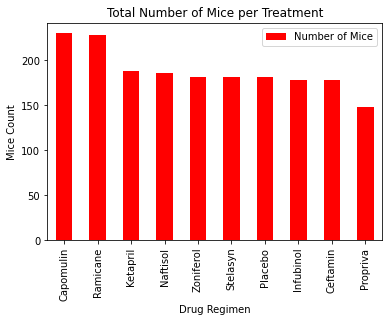

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_bars_pd = cleaned_data["Drug Regimen"].value_counts()

mice_bars_pd.plot(kind="bar", facecolor="red", label="Number of Mice", legend=True)
plt.title("Total Number of Mice per Treatment")
plt.ylabel("Mice Count")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

# Added list of the number of mice per drug regimen
mice_bars_pd

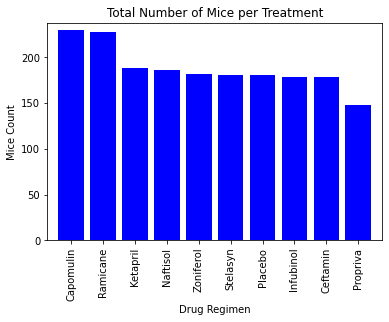

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
# imported numpy to assist with generating bar chart for pyplot
import numpy as np
mice_bars_pyplot = cleaned_data["Drug Regimen"].value_counts()
drug_reg = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol",
           "Ceftamin", "Propriva"]
x_axis = np.arange(len(mice_bars_pyplot))

plt.bar(x_axis, mice_bars_pyplot, color="blue", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_reg, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mice_bars_pyplot)+7.5)
plt.title("Total Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

# Added list of the number of mice per drug regimen
mice_bars_pyplot

,Total Count,Percentage
Sex,,
Female,124,49.799197
Male,125,50.200803


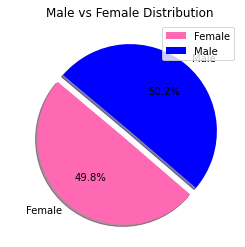

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Used value_counts to count total male and female mice
mice_gender_gb = combined_df.groupby(["Mouse ID", "Sex"])
mice_gender_df = pd.DataFrame(mice_gender_gb.size())

# Creating Data Frame
mice_gender = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# Calculating percentages
mice_gender["Percentage"] = (100*(mice_gender["Total Count"] / mice_gender["Total Count"].sum()))
# Creating Column
mice_gender["Percentage"] = mice_gender["Percentage"]

# Created pie chart
mice_pie_pd = mice_gender.plot(kind='pie', y="Total Count", autopct='%1.1f%%', startangle=140, explode=(0.1,0), shadow=True,
                              colors = ["hotpink", "blue"])
mice_pie_pd.set_title("Male vs Female Distribution")
mice_pie_pd.set_ylabel(' ')

# Added count of mice per gender
mice_gender

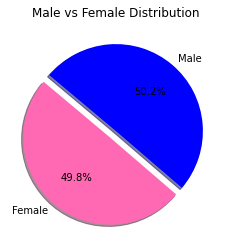

[49.799, 50.2]

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# For cleaner purpose, setting values for pyplot pie
mice_gender_py = [49.799, 50.200] # figures from previous calculations
genders = ["Female", "Male"]
colors = ["hotpink", "blue"]
explode = (0.1, 0)

# Create pie chart
plt.pie(mice_gender_py, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Distribution")
plt.show()

# Added count of mice per gender
mice_gender_py

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = cleaned_data.loc[:, ["Mouse ID", "Timepoint"]].groupby("Mouse ID").max()
max_time # Test to ensure max time points were grouped

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint_max = pd.merge(max_time, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
timepoint_max # Data Frame of all mice with max timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for all_drugs in drugs:
    treatment_df = timepoint_max.loc[:, "Drug Regimen"]==all_drugs
    
    quantiles = [.25, .5, .75]
    
    tum_vol = timepoint_max.loc[treatment_df, "Tumor Volume (mm3)"]
    
    tumor_vol.append(tum_vol)
    
    quartiles = tum_vol.quantile(quantiles)
    
    lower_q = quartiles.loc[.25]
    upper_q = quartiles.loc[.75]
    inner_q = upper_q - lower_q
    lower_bound = lower_q - (1.5*inner_q)
    upper_bound = upper_q + (1.5*inner_q)
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    bound_df = (tum_vol>upper_bound) | (tum_vol<lower_bound)
    
    # Determine outliers using upper and lower bounds
    outliers = len(tum_vol.loc[bound_df])
    print(f"There are {outliers} outliers for {all_drugs}")

There are 0 outliers for Capomulin
There are 0 outliers for Ramicane
There are 1 outliers for Infubinol
There are 0 outliers for Ceftamin


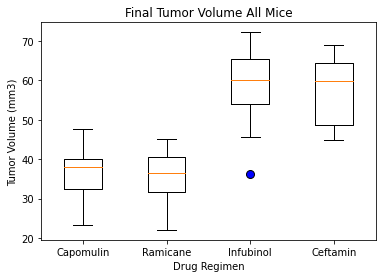

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
outlier = dict(markerfacecolor='blue', markersize=8)

plt.boxplot(tumor_vol, labels=regimen, flierprops=outlier)
plt.title('Final Tumor Volume All Mice')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Created data frame of only Capomulin mice
cap_mice = cleaned_data[cleaned_data["Drug Regimen"]=="Capomulin"]
#cap_mice

# Created data frame of singular mouse
s185 = cap_mice[cap_mice["Mouse ID"]=="s185"]
s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


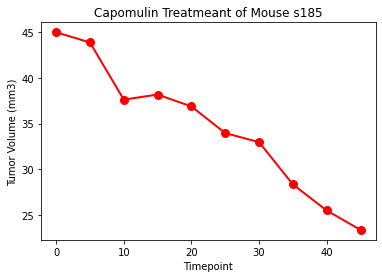

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = s185["Timepoint"]
tumor_size = s185["Tumor Volume (mm3)"]

plt.title('Capomulin Treatmeant of Mouse s185')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=8,marker="o",color="red")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

<AxesSubplot:title={'center':'Tumor Volume vs Mouse Weight with Capomulin'}, xlabel='Weight (g)', ylabel='Tumor Volume (mm3)'>

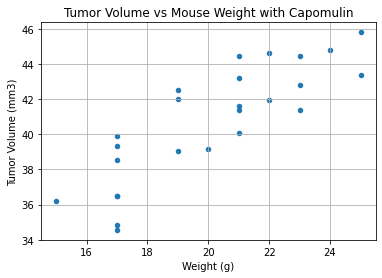

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Sort for information needed for the scatter plot
scatter_mice = cap_mice.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Calculate average tumor volume
group_mice = scatter_mice.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()
group_mice_df = pd.DataFrame(group_mice).reset_index()
# group_mice_df - created new data frame with info needed for scatter plot

cap_mice_sp = group_mice_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True)
cap_mice_sp.set_title("Tumor Volume vs Mouse Weight with Capomulin")
cap_mice_sp

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy import stats

# Setting regress values
x_values = group_mice_df["Weight (g)"]
y_values = group_mice_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64


In [24]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.95x +21.55


In [49]:
# Calculating correlation coefficient, used pearson r function
corr_coeff = round(st.pearsonr(x_values,y_values)[0], 2)
print(corr_coeff)

0.84


The correlation coefficient is 0.84
The r-value is: 0.7088568047708717
The equation of the regression line is y = 0.95x +21.55


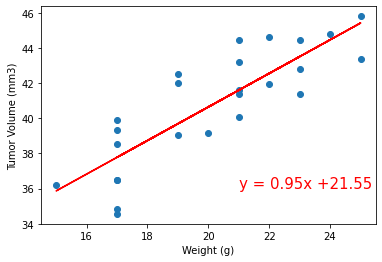

In [50]:
# Creating scatter plots
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(21,36),fontsize=15,color="red")

# Print cprrelation coefficient, r value, and equation of regression line
print(f"The correlation coefficient is {corr_coeff}")
print(f"The r-value is: {rvalue**2}")
print(f"The equation of the regression line is {line_eq}")

# Show plot
plt.show()